# 사용하지 않는 이유와 사용하는 이유를 시각화 하여 개선안 도출을 좀 더 효율적으로 하고자 함.

## 사용하지 않는 이유부터 뜯어보자.

In [11]:
import pandas as pd

why_use = pd.read_csv("사용하는이유.csv", encoding="cp949", header=1)
why_use1 = why_use.copy()

In [12]:
why_use.head()

,특성별(1),특성별(2),지역경제 활성화를 위해서,수당 및 지원금 등 지급받는 것이 많아서 (농민수당 전입지원금 등),활인 등 혜택이 만족스러워서,사용이 편리해서,기타
0,전체,소계,36.0,31.0,28.6,3.6,0.8
1,지역별,읍부,39.3,16.6,37.6,5.2,1.2
2,지역별,면부,33.8,40.8,22.5,2.5,0.5
3,성별,남자,39.0,29.3,27.0,3.3,1.4
4,성별,여자,32.8,32.8,30.3,3.9,0.2


In [21]:
why_use1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   특성별(1)                                 46 non-null     object 
 1   특성별(2)                                 46 non-null     object 
 2   지역경제 활성화를 위해서                          46 non-null     float64
 3   수당 및 지원금 등 지급받는 것이 많아서 (농민수당 전입지원금 등)  46 non-null     float64
 4   활인 등 혜택이 만족스러워서                        46 non-null     float64
 5   사용이 편리해서                               46 non-null     float64
 6   기타                                     46 non-null     float64
dtypes: float64(5), object(2)
memory usage: 2.6+ KB


In [24]:
for index, row in why_use1.iterrows():
    if '직업별' in row[0]:
        print(f"연령별 데이터 시작 행: {index}")
        # 추가적인 조건을 통해 끝나는 행을 찾을 수 있음

연령별 데이터 시작 행: 27
연령별 데이터 시작 행: 28
연령별 데이터 시작 행: 29
연령별 데이터 시작 행: 30
연령별 데이터 시작 행: 31
연령별 데이터 시작 행: 32
연령별 데이터 시작 행: 33
연령별 데이터 시작 행: 34
연령별 데이터 시작 행: 35
연령별 데이터 시작 행: 36
연령별 데이터 시작 행: 37
연령별 데이터 시작 행: 38
연령별 데이터 시작 행: 39


In [34]:
# 성별 데이터가 위치한 행 번호
start_row = 3
end_row = 4

# 성별 데이터 추출
sex_data = why_use1.iloc[start_row:end_row + 1]  # end_row + 1을 사용하여 마지막 행 포함

# 첫 번째 열 drop
sex_data = sex_data.drop(columns=sex_data.columns[0])

# 0번째 열을 인덱스로 설정
sex_data.set_index(sex_data.columns[0], inplace=True)

# 새 데이터프레임 확인
sex_data.head()

,지역경제 활성화를 위해서,수당 및 지원금 등 지급받는 것이 많아서 (농민수당 전입지원금 등),활인 등 혜택이 만족스러워서,사용이 편리해서,기타
특성별(2),,,,,
남자,39.0,29.3,27.0,3.3,1.4
여자,32.8,32.8,30.3,3.9,0.2


In [18]:
# 연령별 데이터가 위치한 행 번호
start_row = 5
end_row = 11

# 연령별 데이터 추출
age_data = why_use1.iloc[start_row:end_row + 1]  # end_row + 1을 사용하여 마지막 행 포함

# 새 데이터프레임 확인
age_data.head()

,특성별(1),특성별(2),지역경제 활성화를 위해서,수당 및 지원금 등 지급받는 것이 많아서 (농민수당 전입지원금 등),활인 등 혜택이 만족스러워서,사용이 편리해서,기타
5,연령별,15~19세,66.7,33.3,0.0,0.0,0.0
6,연령별,20~29세,27.9,28.9,31.5,4.5,7.1
7,연령별,30~39세,31.3,11.6,52.4,2.1,2.6
8,연령별,40~49세,43.1,20.3,33.4,2.2,1.0
9,연령별,50~59세,45.5,19.5,31.6,2.5,0.9


In [23]:
# 학력별 데이터가 위치한 행 번호
start_row = 12
end_row = 19

# 학력별 데이터 추출
education_data = why_use1.iloc[start_row:end_row + 1]  # end_row + 1을 사용하여 마지막 행 포함

# 새 데이터프레임 확인
education_data.head()

,특성별(1),특성별(2),지역경제 활성화를 위해서,수당 및 지원금 등 지급받는 것이 많아서 (농민수당 전입지원금 등),활인 등 혜택이 만족스러워서,사용이 편리해서,기타
12,학력별,안받았음,22.2,66.7,8.9,2.2,0.0
13,학력별,초등학교,20.9,48.4,26.5,3.6,0.5
14,학력별,중등학교,36.1,35.5,23.9,4.5,0.0
15,학력별,고등학교,42.4,25.7,27.6,3.7,0.6
16,학력별,대학(4년제미만),41.8,22.9,33.3,2.0,0.0


In [25]:
# 직업별 데이터가 위치한 행 번호
start_row = 27
end_row = 39

# 직엽별 데이터 추출
occupation_data = why_use1.iloc[start_row:end_row + 1]  # end_row + 1을 사용하여 마지막 행 포함

# 새 데이터프레임 확인
occupation_data.head()

,특성별(1),특성별(2),지역경제 활성화를 위해서,수당 및 지원금 등 지급받는 것이 많아서 (농민수당 전입지원금 등),활인 등 혜택이 만족스러워서,사용이 편리해서,기타
27,직업별,관리자,42.3,8.0,45.3,4.4,0.0
28,직업별,전문가 및 관련종사자,58.1,9.9,30.6,1.4,0.0
29,직업별,사무직,43.3,7.0,39.3,5.4,4.9
30,직업별,서비스직,44.7,24.7,26.4,4.3,0.0
31,직업별,판매종사자,53.2,17.0,29.8,0.0,0.0


TypeError: no numeric data to plot

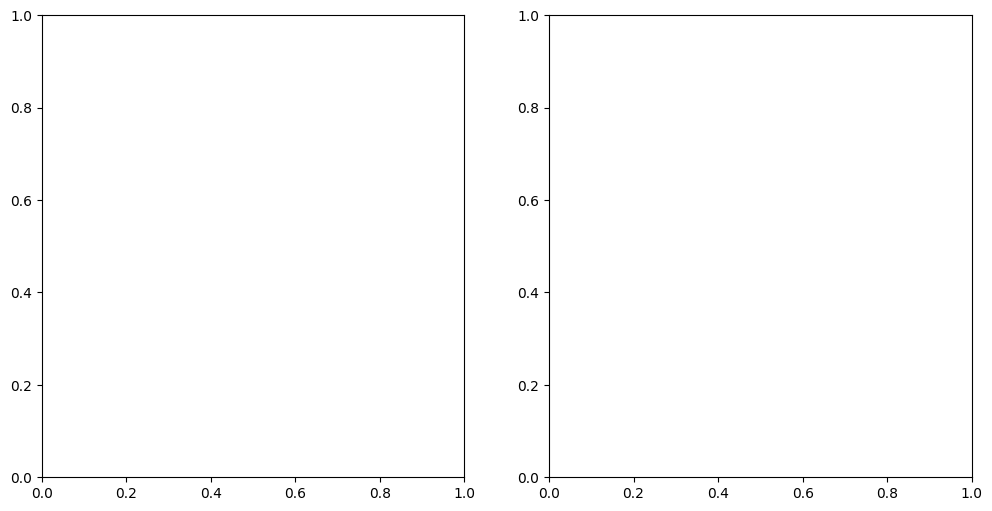

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 로드 (실제 파일 경로와 인코딩 설정)
why_use = pd.read_csv("사용하는이유.csv", encoding="cp949", header=1)
why_use1 = why_use.copy()

# 성별 데이터가 위치한 행 번호
start_row = 3
end_row = 4

# 성별 데이터 추출
sex_data = why_use1.iloc[start_row:end_row + 1]  # end_row + 1을 사용하여 마지막 행 포함

# 성별 데이터가 여러 행이므로 각 행을 Series로 변환하여 처리
# 여기서는 두 번째 행만을 사용하여 시각화
sex_series = sex_data.iloc[0, 1:]  # 첫 번째 열을 제외한 나머지 열을 Series로 추출
sex_series.index = why_use1.columns[1:]  # 첫 번째 열을 제외한 열 이름을 인덱스로 설정

# 막대 그래프와 원형 그래프를 위한 1행 2열의 플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 1행 2열의 첫 번째 그래프 (막대 그래프)
sex_series.plot(kind='bar', ax=axes[0])
axes[0].set_title('Sex Data Bar Plot')
axes[0].set_xlabel('Categories')
axes[0].set_ylabel('Values')

# 1행 2열의 두 번째 그래프 (원형 그래프)
sex_series.plot(kind='pie', ax=axes[1], autopct='%1.1f%%')
axes[1].set_title('Sex Data Pie Chart')
axes[1].set_ylabel('')  # 원형 그래프에서 y축 라벨 제거

# 그래프 출력
plt.tight_layout()
plt.show()